<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 2 (two) categories. With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

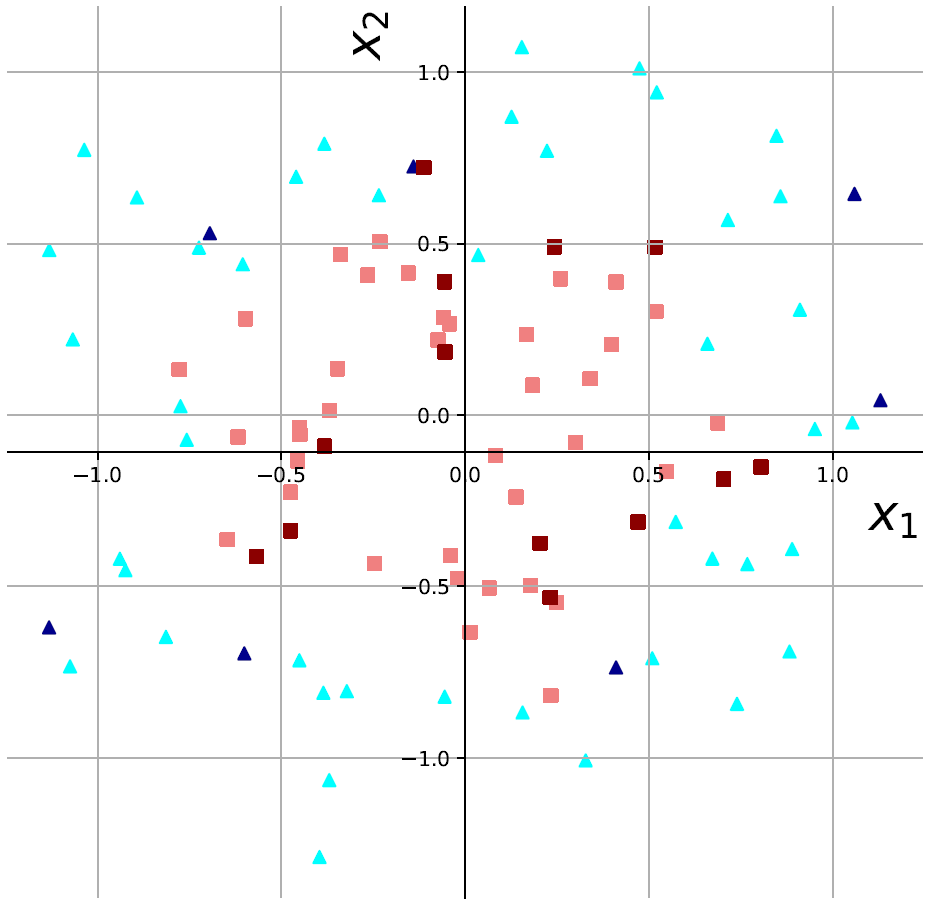

In [1]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

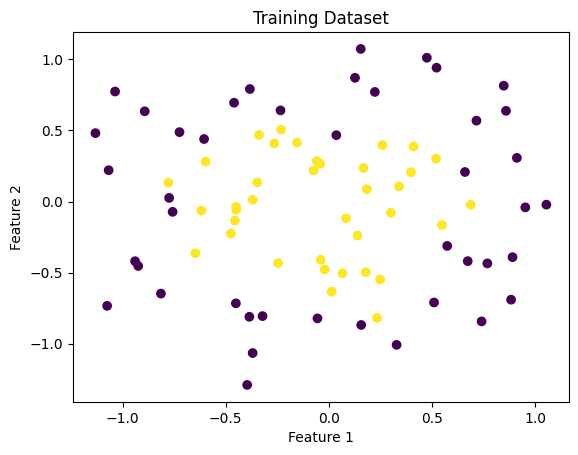

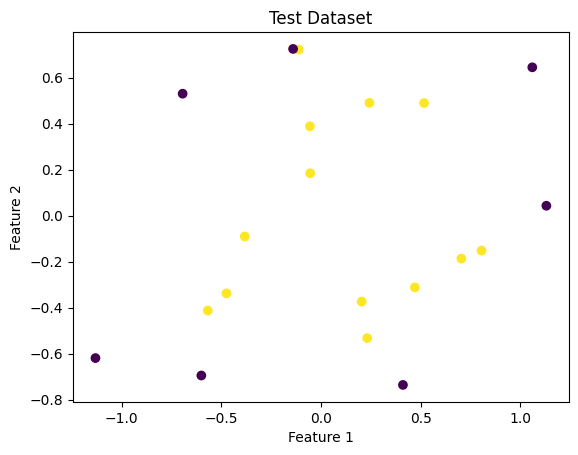

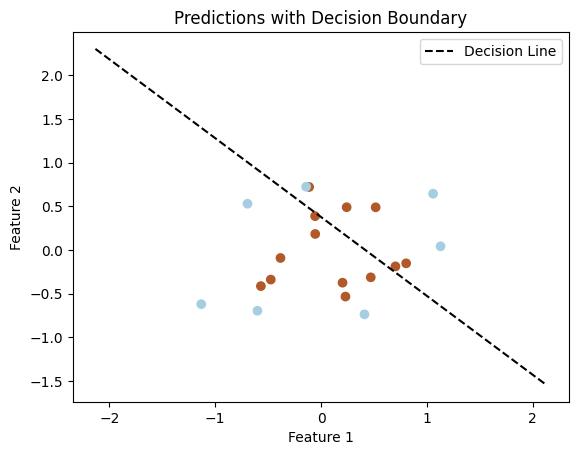

Accuracy: 0.65


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_train(X, y, learning_rate=0.1, max_epochs=1000):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    weights = np.zeros(X.shape[1])

    for _ in range(max_epochs):
        converged = True
        for i in range(X.shape[0]):
            activation = np.dot(X[i], weights)
            prediction = 1 if activation >= 0 else 0
            error = y[i] - prediction
            if error != 0:
                weights += learning_rate * error * X[i]
                converged = False
        if converged:
            break

    return weights

def perceptron_predict(X, weights):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    predictions = np.dot(X, weights)
    return np.where(predictions >= 0, 1, 0)

def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

def plot_decision_boundary(X, y, weights):
    h = 0.02  # Ajeitando o grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron_predict(X_grid, weights)
    Z = Z.reshape(xx.shape)

    # Plot dos dados
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    
    # Plot da linha
    w0, w1, b = weights[:-1], weights[-1], weights[-2]
    x_line = np.linspace(x_min, x_max, num=100)
    y_line = -(w0[0] * x_line + b) / w1
    plt.plot(x_line, y_line, color='black', linestyle='--', label='Decision Line')
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Predictions with Decision Boundary')
    plt.legend()
    plt.show()


# Carregando dados
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Plotando os dois datasets
plot_dataset(X_train, y_train, "Training Dataset")
plot_dataset(X_test, y_test, "Test Dataset")

# Treinando classificadores
weights = perceptron_train(X_train, y_train, learning_rate=0.4, max_epochs=1000)

# Predicoes
predictions = perceptron_predict(X_test, weights)

# Plot
plot_decision_boundary(X_test, y_test, weights)

# Acuracia
accuracy_value = accuracy(y_test, predictions)
print("Accuracy:", accuracy_value)


In [3]:
assert accuracy(predictions, y_test) > 0.55

In [4]:
assert accuracy(predictions, y_test) > 0.60